# Loading the Data

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report

In [17]:
data = pd.read_csv('loan_data_set.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
data.isna().sum()*100/len(data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# Missing Values 

Gender 

<Axes: xlabel='Gender', ylabel='count'>

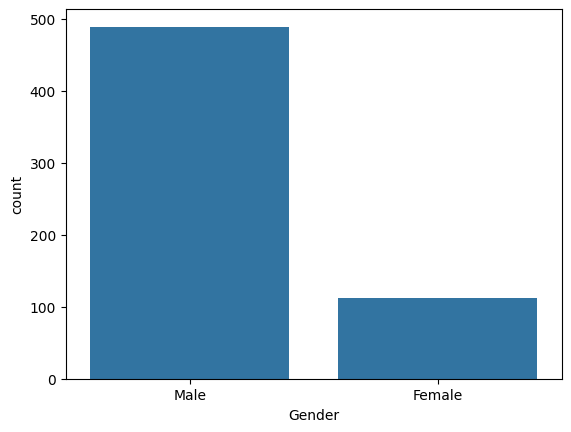

In [15]:
# assume that every missing value in this column is the mode of this column
sns.countplot(x = data['Gender'])

In [21]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

Married

<Axes: xlabel='Married', ylabel='count'>

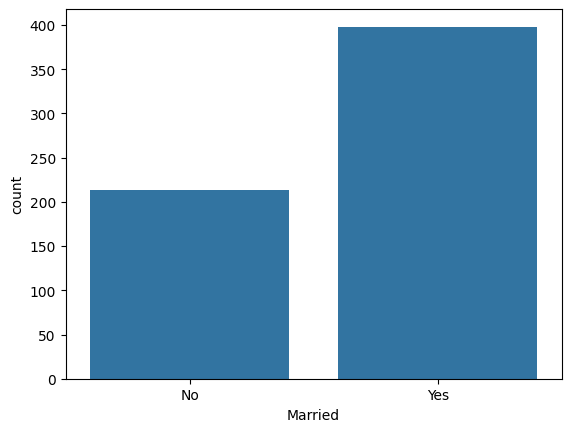

In [22]:
sns.countplot(x = data['Married'])

In [24]:
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

Median for amounts

In [26]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Feature Engineering

In [31]:
data = data.replace({
    'Married': {'No': 0, 'Yes': 1},
    'Gender': {'Male': 0, 'Female': 1},
    'Education': {'Not Graduate': 0, 'Graduate': 1},
    'Self_Employed': {'No': 0, 'Yes': 1},
    'Loan_Status': {'N': 0, 'Y': 1}
}).infer_objects(copy=False)

data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,0,1,3+,1,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1


# Train Test Split

In [36]:
x = data.drop(['Loan_Status', 'Loan_ID'], axis = 1)
y = data['Loan_Status']
x = x.join(pd.get_dummies(x[['Dependents', 'Property_Area']])).drop(['Dependents', 'Property_Area'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [42]:
random_forest = RandomForestClassifier(random_state = 0,
                                       max_depth = 5,
                                       min_samples_split = 0.01,
                                       max_features = 0.8,
                                       max_samples = 0.8)
model = random_forest.fit(x_train, y_train)
random_forest_predict = random_forest.predict(x_test)
c_matrix = confusion_matrix(y_test, random_forest_predict)
a_score = accuracy_score(y_test, random_forest_predict)
print("confusion matrix:")
c_matrix


confusion matrix:


array([[12, 29],
       [ 0, 82]])

In [41]:
print("Accuracy:") 
a_score*100

Accuracy:


76.42276422764228

# Feature Importance

In [43]:
features = list(x.columns)
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importance', 'features']
importances.sort_values(by = 'importance', ascending = True, inplace = True)

<BarContainer object of 16 artists>

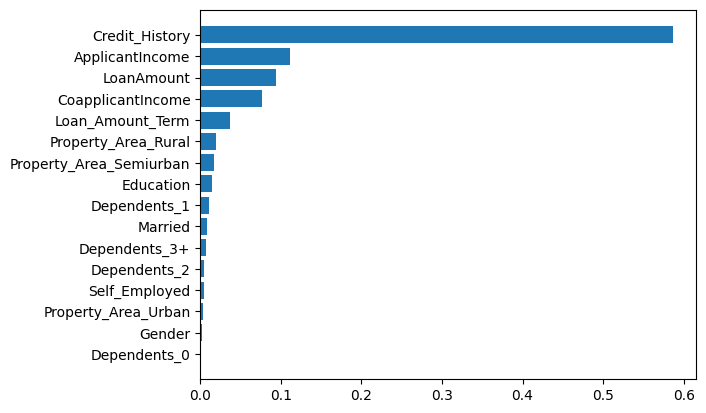

In [44]:
plt.barh(importances.features, importances.importance)